In [147]:
import numpy as np
from scipy import integrate
import scipy.io as io
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
#from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import norm
%run define.ipynb

In [148]:
jmx=101; #101
delx = 2.0/jmx
x = np.arange(-1.0+delx/2,1.0,delx)
phi = np.arcsin(x)*180/np.pi

In [149]:
mean_data = io.loadmat('MEBM_output_Rf_B.mat')
Rf_mean = mean_data['Rf_mean'][0]
G_mean = mean_data['G_mean'][0]
T_ctrl_mean = mean_data['T_ctrl_mean'][0]

In [150]:
B_bv = io.loadmat('synthetic_latdep_B.mat')
B_Bllb = np.array(B_bv['Dllb']).flatten()
B_Bllv = np.array(B_bv['Dllv']).flatten()
B_Bmlb = np.array(B_bv['Dmlb']).flatten()
B_Bmlv = np.array(B_bv['Dmlv']).flatten()
B_Bhlb = np.array(B_bv['Dhlb']).flatten()
B_Bhlv = np.array(B_bv['Dhlv']).flatten()
B_df = 1.29 * np.ones(101)
B_double = 2 * B_df
B_half = 0.5 * B_df

B_list_magnitude = [B_half, B_df, B_double]
B_list_shape = [B_Bllb, B_Bllv, B_Bmlb, B_Bmlv, B_Bhlb, B_Bhlv]

In [151]:
T_pert_MEBM_magnitude = np.zeros((3,101))
divF_pert_MEBM_magnitude = np.zeros((3,101))
E_m_P_pert_MEBM_magnitude = np.zeros((3,101))

for i in range(3):
    T_ctrl, T_pert, divF_ctrl, divF_pert, E_m_P_ctrl, E_m_P_pert = operate(Rf_mean+G_mean, T_ctrl_mean, B_list_magnitude[i], G_mean)
    T_pert_MEBM_magnitude[i] = T_pert
    divF_pert_MEBM_magnitude[i] = divF_pert
    E_m_P_pert_MEBM_magnitude[i] = E_m_P_pert

0.33332484483148006
-0.7839273569839073
-1.685521619119312
-2.41308537974084
-3.0002109283395972
-3.474006392702631
-3.856347346160939
-4.164886822974923
-4.413870375198625
-4.614793802949509
-4.77693392609667
-4.9077769035854315
-5.01336387629661
-5.098569892089603
-5.167328991255897
-5.222815844785659
-5.26759233185375
-5.303725824142754
-5.332884638299258
-5.356415063651248
-5.37540352162743
-5.390726726835978
-5.4030921657862025
-5.4130707621928105
-5.4211232370500975
-5.427621380544924
-5.43286521795241
-5.437096862079395
-5.440511691835899
-5.443267373059569
-5.445491138092651
-5.447285660216584
-5.448733794171992
-5.449902401638485
-5.450845438300011
-5.4516064450284984
-5.452220558206122
-5.4527161320043485
-5.453116047522274
-5.453438769228014
-5.453699197480201
-5.4539093564912875
-5.454078949496539
-5.454215806761339
-5.454326247111763
-5.4544153696805875
-5.454487289338961
-5.454545326683818
-5.454592161352868
-5.454629955745948
-5.454660454865018
-5.454685066882541
-5.4547

In [162]:
deltaB_T_half = (B_half - B_df) * (T_pert_MEBM_magnitude[1])
B_deltaT_half = B_df * (T_pert_MEBM_magnitude[0]-T_pert_MEBM_magnitude[1])
deltaB_deltaT_half = (B_half - B_df) * (T_pert_MEBM_magnitude[0]-T_pert_MEBM_magnitude[1])
deltaF_pert_half = divF_pert_MEBM_magnitude[0] - divF_pert_MEBM_magnitude[1]

deltaB_T_double = (B_double - B_df) * (T_pert_MEBM_magnitude[1])
B_deltaT_double = B_df * (T_pert_MEBM_magnitude[2]-T_pert_MEBM_magnitude[1])
deltaB_deltaT_double = (B_double - B_df) * (T_pert_MEBM_magnitude[2]-T_pert_MEBM_magnitude[1])
deltaF_pert_double = divF_pert_MEBM_magnitude[2] - divF_pert_MEBM_magnitude[1]

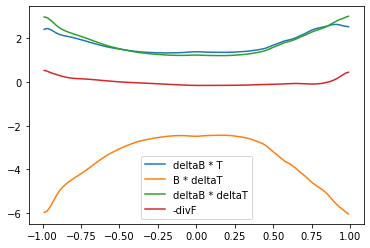

In [156]:
plt.figure()
plt.plot(x, deltaB_T_half, label = 'deltaB * T')
plt.plot(x, B_deltaT_half, label = 'B * deltaT')
plt.plot(x, deltaB_deltaT_half, label = 'deltaB * deltaT')
plt.plot(x, deltaF_pert_half, label = '-divF')
plt.legend()
plt.show()

In [157]:
T_pert_MEBM_shape = np.zeros((6,101))
divF_pert_MEBM_shape = np.zeros((6,101))
E_m_P_pert_MEBM_shape = np.zeros((6,101))

for i in range(6):
    T_ctrl, T_pert, divF_ctrl, divF_pert, E_m_P_ctrl, E_m_P_pert = operate(Rf_mean+G_mean, T_ctrl_mean, B_list_shape[i], G_mean)
    T_pert_MEBM_shape[i] = T_pert
    divF_pert_MEBM_shape[i] = divF_pert
    E_m_P_pert_MEBM_shape[i] = E_m_P_pert

0.33332262466885143
-0.7205754297668033
-1.3585684027537812
-1.7493378529908574
-1.9895874711001682
-2.1374931077103265
-2.2285930859030816
-2.284714851495084
-2.31929090605732
-2.3405934906360923
-2.3537183520777663
-2.361804836432894
-2.366787092691386
-2.369856772264047
-2.3717480721232995
-2.372913345800537
-2.373631298102207
-2.374073645327944
-2.3743461858319974
-2.374514104436709
-2.374617563033862
-2.374681306306263
-2.3747205800339177
-2.3747447775000836
-2.3747596861273177
-2.37476887168267
-2.3747745311190114
-2.3747780180306117
-2.374780166398713
-2.374781490058732
-2.3747823055967365
-2.374782808068845
-2.374783117653705
-2.374783308396202
-2.374783425917134
-2.374783498324535
-2.37478354293643
-2.3747835704228657
-2.3747835873579004
-2.374783597791966
-2.3747836042206285
-2.3747836081814673
-2.374783610621812
-2.3747836121253436
-2.3747836130516795
-2.374783613622378
-2.3747836139739884
-2.3747836141906027
-2.3747836143240444
-2.3747836144062293
0.33332420535395113
-0.748

In [163]:
deltaB_T_Bllb = (B_Bllb - B_df) * (T_pert_MEBM_magnitude[1])
B_deltaT_Bllb = B_df * (T_pert_MEBM_shape[0]-T_pert_MEBM_magnitude[1])
deltaB_deltaT_Bllb = (B_Bllb - B_df) * (T_pert_MEBM_shape[0]-T_pert_MEBM_magnitude[1])
deltaF_pert_Bllb = divF_pert_MEBM_shape[0] - divF_pert_MEBM_magnitude[1]

deltaB_T_Bllv = (B_Bllv - B_df) * (T_pert_MEBM_magnitude[1])
B_deltaT_Bllv = B_df * (T_pert_MEBM_shape[1]-T_pert_MEBM_magnitude[1])
deltaB_deltaT_Bllv = (B_Bllv - B_df) * (T_pert_MEBM_shape[1]-T_pert_MEBM_magnitude[1])
deltaF_pert_Bllv = divF_pert_MEBM_shape[1] - divF_pert_MEBM_magnitude[1]

deltaB_T_Bmlb = (B_Bmlb - B_df) * (T_pert_MEBM_magnitude[1])
B_deltaT_Bmlb = B_df * (T_pert_MEBM_shape[2]-T_pert_MEBM_magnitude[1])
deltaB_deltaT_Bmlb = (B_Bmlb - B_df) * (T_pert_MEBM_shape[2]-T_pert_MEBM_magnitude[1])
deltaF_pert_Bmlb = divF_pert_MEBM_shape[2] - divF_pert_MEBM_magnitude[1]

deltaB_T_Bmlv = (B_Bmlv - B_df) * (T_pert_MEBM_magnitude[1])
B_deltaT_Bmlv = B_df * (T_pert_MEBM_shape[3]-T_pert_MEBM_magnitude[1])
deltaB_deltaT_Bmlv = (B_Bmlv - B_df) * (T_pert_MEBM_shape[3]-T_pert_MEBM_magnitude[1])
deltaF_pert_Bmlv = divF_pert_MEBM_shape[3] - divF_pert_MEBM_magnitude[1]

deltaB_T_Bhlb = (B_Bhlb - B_df) * (T_pert_MEBM_magnitude[1])
B_deltaT_Bhlb = B_df * (T_pert_MEBM_shape[4]-T_pert_MEBM_magnitude[1])
deltaB_deltaT_Bhlb = (B_Bhlb - B_df) * (T_pert_MEBM_shape[4]-T_pert_MEBM_magnitude[1])
deltaF_pert_Bhlb = divF_pert_MEBM_shape[4] - divF_pert_MEBM_magnitude[1]

deltaB_T_Bhlv = (B_Bhlv - B_df) * (T_pert_MEBM_magnitude[1])
B_deltaT_Bhlv = B_df * (T_pert_MEBM_shape[5]-T_pert_MEBM_magnitude[1])
deltaB_deltaT_Bhlv = (B_Bhlv - B_df) * (T_pert_MEBM_shape[5]-T_pert_MEBM_magnitude[1])
deltaF_pert_Bhlv = divF_pert_MEBM_shape[5] - divF_pert_MEBM_magnitude[1]

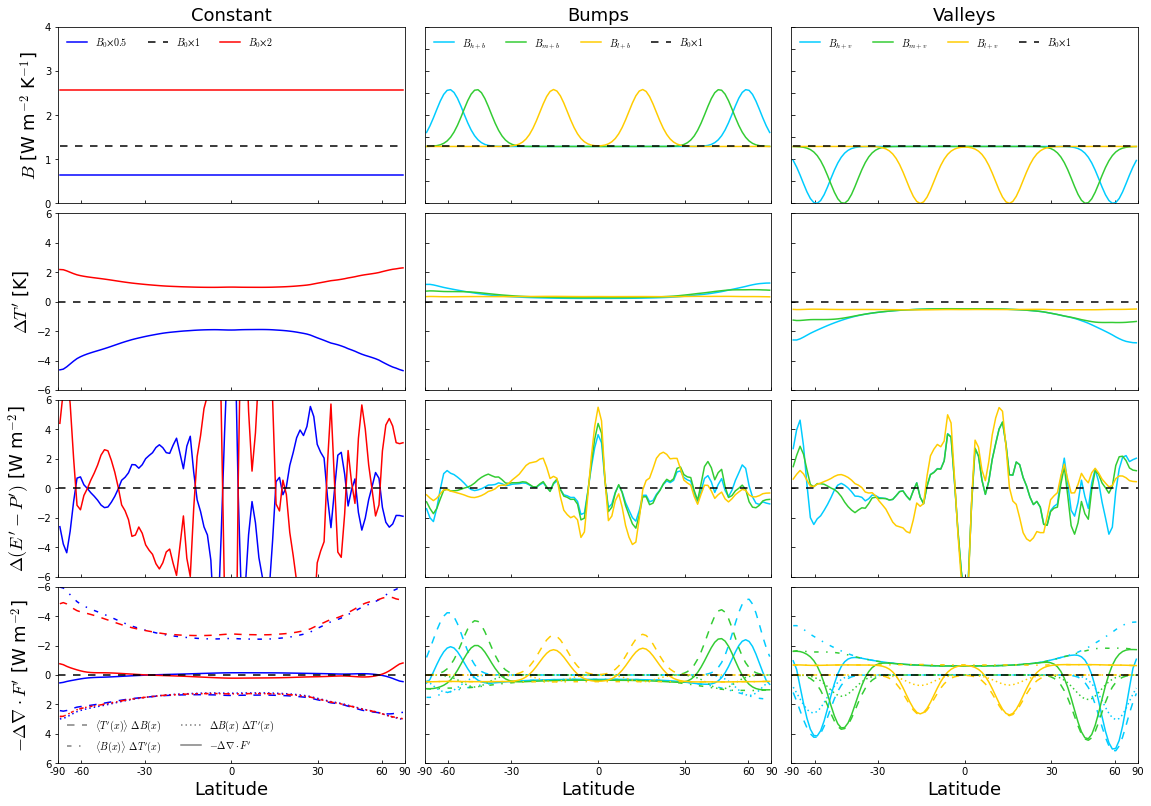

In [165]:
plt.ioff()
plt.rcParams['mathtext.fontset'] = 'cm'
fig, axis = plt.subplots(nrows=4, ncols=3, figsize=(16, 11))

# [0,0]
axis[0,0].plot(x, B_half, label = r'$B_{0} × 0.5$', color = 'blue')
axis[0,0].plot(x, B_df, label = r'$B_{0} × 1$', color = 'black', linestyle = (0,(5,5)))
axis[0,0].plot(x, B_double, label = r'$B_{0} × 2$', color = 'red')

axis[0,0].set_title("Constant", fontsize = 18)
axis[0,0].set_ylim(0,4)
axis[0,0].set_xlim(-1,1)
axis[0,0].legend(ncol=4,frameon=False, loc='upper left')
axis[0,0].set_ylabel(r"$B$ [W m$^{-2}$ K$^{-1}$]", fontsize = 18)
axis[0,0].tick_params(axis='x',direction='in', labelbottom=False)
axis[0,0].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
axis[0,0].set_yticks([0,1,2,3,4])

# [0,1]
axis[0,1].plot(x, B_Bhlb, label = r'$B_{h+b}$', color = '#00CCFF')
axis[0,1].plot(x, B_Bmlb, label = r'$B_{m+b}$', color = '#33CC33')
axis[0,1].plot(x, B_Bllb, label = r'$B_{l+b}$', color = '#FFCC00')
axis[0,1].plot(x, B_df, label = r'$B_{0} × 1$', color = 'black', linestyle = (0,(5,5)))

axis[0,1].set_title("Bumps", fontsize = 18)
axis[0,1].set_ylim(0,4)
axis[0,1].set_xlim(-1,1)
axis[0,1].legend(ncol=4,frameon=False, loc='upper left')
axis[0,1].tick_params(axis='both',direction='in', labelbottom=False, labelleft=False)
axis[0,1].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [0,2]
axis[0,2].plot(x, B_Bhlv, label = r'$B_{h+v}$', color = '#00CCFF')
axis[0,2].plot(x, B_Bmlv, label = r'$B_{m+v}$', color = '#33CC33')
axis[0,2].plot(x, B_Bllv, label = r'$B_{l+v}$', color = '#FFCC00')
axis[0,2].plot(x, B_df, label = r'$B_{0} × 1$', color = 'black', linestyle = (0,(5,5)))

axis[0,2].set_title("Valleys", fontsize = 18)
axis[0,2].set_ylim(0,4)
axis[0,2].set_xlim(-1,1)
axis[0,2].legend(ncol=4,frameon=False, loc='upper left')
axis[0,2].tick_params(axis='both',direction='in', labelbottom=False, labelleft=False)
axis[0,2].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [1,0]
axis[1,0].plot(x, T_pert_MEBM_magnitude[0]-T_pert_MEBM_magnitude[1], color = 'blue')
axis[1,0].plot(x, T_pert_MEBM_magnitude[2]-T_pert_MEBM_magnitude[1], color = 'red')
axis[1,0].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))

axis[1,0].set_ylim(-6,6)
axis[1,0].set_xlim(-1,1)
axis[1,0].set_ylabel(r"$\Delta T'$ [K]", fontsize = 18)
axis[1,0].tick_params(axis='x',direction='in', labelbottom=False)
axis[1,0].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [1,1]
axis[1,1].plot(x, T_pert_MEBM_shape[4]-T_pert_MEBM_magnitude[1], color = '#00CCFF')
axis[1,1].plot(x, T_pert_MEBM_shape[2]-T_pert_MEBM_magnitude[1], color = '#33CC33')
axis[1,1].plot(x, T_pert_MEBM_shape[0]-T_pert_MEBM_magnitude[1], color = '#FFCC00')
axis[1,1].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))

axis[1,1].set_ylim(-6,6)
axis[1,1].set_xlim(-1,1)
axis[1,1].tick_params(axis='both',direction='in', labelbottom=False, labelleft=False)
axis[1,1].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [1,2]
axis[1,2].plot(x, T_pert_MEBM_shape[5]-T_pert_MEBM_magnitude[1], color = '#00CCFF')
axis[1,2].plot(x, T_pert_MEBM_shape[3]-T_pert_MEBM_magnitude[1], color = '#33CC33')
axis[1,2].plot(x, T_pert_MEBM_shape[1]-T_pert_MEBM_magnitude[1], color = '#FFCC00')
axis[1,2].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))

axis[1,2].set_ylim(-6,6)
axis[1,2].set_xlim(-1,1)
axis[1,2].tick_params(axis='both',direction='in', labelbottom=False, labelleft=False)
axis[1,2].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [2,0]
axis[2,0].plot(x, (E_m_P_pert_MEBM_magnitude[2]-E_m_P_pert_MEBM_magnitude[1])*(2.45e6*1e3/(np.pi*1e7)), color = 'blue')
axis[2,0].plot(x, (E_m_P_pert_MEBM_magnitude[0]-E_m_P_pert_MEBM_magnitude[1])*(2.45e6*1e3/(np.pi*1e7)), color = 'red')
axis[2,0].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))

axis[2,0].set_ylim(-6,6)
axis[2,0].set_xlim(-1,1)
axis[2,0].set_ylabel(r"$\Delta (E'-P')$ [W m$^{-2}$]", fontsize = 18)
axis[2,0].tick_params(axis='x',direction='in', labelbottom=False)
axis[2,0].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [2,1]
axis[2,1].plot(x, (E_m_P_pert_MEBM_shape[4]-E_m_P_pert_MEBM_magnitude[1])*(2.45e6*1e3/(np.pi*1e7)), color = '#00CCFF')
axis[2,1].plot(x, (E_m_P_pert_MEBM_shape[2]-E_m_P_pert_MEBM_magnitude[1])*(2.45e6*1e3/(np.pi*1e7)), color = '#33CC33')
axis[2,1].plot(x, (E_m_P_pert_MEBM_shape[0]-E_m_P_pert_MEBM_magnitude[1])*(2.45e6*1e3/(np.pi*1e7)), color = '#FFCC00')
axis[2,1].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))

axis[2,1].set_ylim(-6,6)
axis[2,1].set_xlim(-1,1)
axis[2,1].tick_params(axis='both',direction='in', labelbottom=False, labelleft=False)
axis[2,1].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [2,2]
axis[2,2].plot(x, (E_m_P_pert_MEBM_shape[5]-E_m_P_pert_MEBM_magnitude[1])*(2.45e6*1e3/(np.pi*1e7)), color = '#00CCFF')
axis[2,2].plot(x, (E_m_P_pert_MEBM_shape[3]-E_m_P_pert_MEBM_magnitude[1])*(2.45e6*1e3/(np.pi*1e7)), color = '#33CC33')
axis[2,2].plot(x, (E_m_P_pert_MEBM_shape[1]-E_m_P_pert_MEBM_magnitude[1])*(2.45e6*1e3/(np.pi*1e7)), color = '#FFCC00')
axis[2,2].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))

axis[2,2].set_ylim(-6,6)
axis[2,2].set_xlim(-1,1)
axis[2,2].tick_params(axis='both',direction='in', labelbottom=False, labelleft=False)
axis[2,2].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [3,0]
axis[3,0].plot([-3,-2], [-3,-2], color = 'grey', linestyle = (0,(5,5)), label = r"$\langle T'(x) \rangle$ $\Delta B(x)$")
axis[3,0].plot([-3,-2], [-3,-2], color = 'grey', linestyle = (0,(3,5,1,5)), label = r"$\langle B(x) \rangle$ $\Delta T'(x)$")
axis[3,0].plot([-3,-2], [-3,-2], color = 'grey', linestyle = (0,(1,2)), label = r"$\Delta B(x)$ $\Delta T'(x)$")
axis[3,0].plot([-3,-2], [-3,-2], color = 'grey', label = r"$-\Delta \nabla \cdot {F'}$")
axis[3,0].legend(ncol=2,frameon=False, loc='lower left')



axis[3,0].plot(x, deltaB_T_half, color = 'blue', linestyle = (0,(5,5)))
axis[3,0].plot(x, B_deltaT_half, color = 'blue', linestyle = (0,(3,5,1,5)))
axis[3,0].plot(x, deltaB_deltaT_half, color = 'blue', linestyle = (0,(1,2)))
axis[3,0].plot(x, deltaF_pert_half, color = 'blue')

axis[3,0].plot(x, deltaB_T_double, color = 'red', linestyle = (0,(5,5)))
axis[3,0].plot(x, B_deltaT_double, color = 'red', linestyle = (0,(3,5,1,5)))
axis[3,0].plot(x, deltaB_deltaT_double, color = 'red', linestyle = (0,(1,2)))
axis[3,0].plot(x, deltaF_pert_double, color = 'red')

axis[3,0].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))

axis[3,0].set_ylim(-6,6)
axis[3,0].set_xlim(-1,1)
axis[3,0].set_ylabel(r"$-\Delta \nabla \cdot {F'}$ [W m$^{-2}$]", fontsize = 18)
axis[3,0].tick_params(axis='x',direction='in')
axis[3,0].invert_yaxis()
axis[3,0].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
axis[3,0].set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
axis[3,0].set_xlabel('Latitude', fontsize = 18)

# [3,1]
axis[3,1].plot(x, deltaB_T_Bhlb, color = '#00CCFF', linestyle = (0,(5,5)))
axis[3,1].plot(x, B_deltaT_Bhlb, color = '#00CCFF', linestyle = (0,(3,5,1,5)))
axis[3,1].plot(x, deltaB_deltaT_Bhlb, color = '#00CCFF', linestyle = (0,(1,2)))
axis[3,1].plot(x, -deltaF_pert_Bhlb, color = '#00CCFF')

axis[3,1].plot(x, deltaB_T_Bmlb, color = '#33CC33', linestyle = (0,(5,5)))
axis[3,1].plot(x, B_deltaT_Bmlb, color = '#33CC33', linestyle = (0,(3,5,1,5)))
axis[3,1].plot(x, deltaB_deltaT_Bmlb, color = '#33CC33', linestyle = (0,(1,2)))
axis[3,1].plot(x, -deltaF_pert_Bmlb, color = '#33CC33')

axis[3,1].plot(x, deltaB_T_Bllb, color = '#FFCC00', linestyle = (0,(5,5)))
axis[3,1].plot(x, B_deltaT_Bllb, color = '#FFCC00', linestyle = (0,(3,5,1,5)))
axis[3,1].plot(x, deltaB_deltaT_Bllb, color = '#FFCC00', linestyle = (0,(1,2)))
axis[3,1].plot(x, -deltaF_pert_Bllb, color = '#FFCC00')

axis[3,1].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))

axis[3,1].set_ylim(-6,6)
axis[3,1].set_xlim(-1,1)
axis[3,1].tick_params(axis='both',direction='in', labelleft=False)
axis[3,1].invert_yaxis()
axis[3,1].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
axis[3,1].set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
axis[3,1].set_xlabel('Latitude', fontsize = 18)

# [3,2]
axis[3,2].plot(x, deltaB_T_Bhlv, color = '#00CCFF', linestyle = (0,(5,5)))
axis[3,2].plot(x, B_deltaT_Bhlv, color = '#00CCFF', linestyle = (0,(3,5,1,5)))
axis[3,2].plot(x, deltaB_deltaT_Bhlv, color = '#00CCFF', linestyle = (0,(1,2)))
axis[3,2].plot(x, -deltaF_pert_Bhlv, color = '#00CCFF')

axis[3,2].plot(x, deltaB_T_Bmlv, color = '#33CC33', linestyle = (0,(5,5)))
axis[3,2].plot(x, B_deltaT_Bmlv, color = '#33CC33', linestyle = (0,(3,5,1,5)))
axis[3,2].plot(x, deltaB_deltaT_Bmlv, color = '#33CC33', linestyle = (0,(1,2)))
axis[3,2].plot(x, -deltaF_pert_Bmlv, color = '#33CC33')

axis[3,2].plot(x, deltaB_T_Bllv, color = '#FFCC00', linestyle = (0,(5,5)))
axis[3,2].plot(x, B_deltaT_Bllv, color = '#FFCC00', linestyle = (0,(3,5,1,5)))
axis[3,2].plot(x, deltaB_deltaT_Bllv, color = '#FFCC00', linestyle = (0,(1,2)))
axis[3,2].plot(x, -deltaF_pert_Bllv, color = '#FFCC00')

axis[3,2].plot([-1,1],[0,0] , color = 'black', linestyle = (0,(5,5)))
axis[3,2].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
axis[3,2].set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
axis[3,2].set_xlabel('Latitude', fontsize = 18)

axis[3,2].set_ylim(-6,6)
axis[3,2].set_xlim(-1,1)
axis[3,2].tick_params(axis='both',direction='in', labelleft=False)
axis[3,2].invert_yaxis()

fig.tight_layout(pad=0, w_pad=0, h_pad=0)

fig.savefig('MEBM_synthetic.png',dpi=300)
plt.show()